# [Group_16]

Group Members: 
1. 1211112369 ANIS SYIFAA' BT MOHD ZAFFARIN
2. 1211112304 KUEH PANG TENG
3. 1211112312 NUR INSYIRAH IMAN BT MOHD AZMAN
4. 1211111880 SOFIA BATRISYIA BT MOHAMAD FARIS

# Part 1	Data Cleaning and Transformation

You will be working with a dataset containing various data quality issues, such as missing data, outliers, unstructured data, and more. Your task is to clean, preprocess, and transform the data to make it suitable for visualisation or further analysis and modeling. Please perform the following tasks using Dataset1:

Two datasets are used in this assignment:

Part 1 and Part 3: 
Dataset1- https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Part 2: 
Dataset2- https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)



# 1.	Missing Data Handling (2 Marks)

•	Identify the columns with missing values and decide on an appropriate strategy to handle them.

•	Implement the chosen method to fill or drop missing data.


In [14]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")

#printing missing counts in all columns
missing_counts = df.isna().sum()
print(missing_counts)

print(df.isnull())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
          id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False    False      False                False          False   
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False   

In [4]:
fill_values = {
    'name': 'NaN',  # Fill missing names with 'NaN'
    'host_name': 'NaN', #fill missing host names with 'NaN'
    'last_review': 0 , # Fill last_review with 0 as the 'number_of_reviews' of the row is 0
    'reviews_per_month': 0.00 #fill missing 'reviews_per_month' with 0 as the 'number_ofreviews' column of the row is 0.
}

df.fillna(value=fill_values, inplace=True) #fill in the values when there is a missing value

missing_counts = df.isna().sum() #count for any missing counts in dataset
print(missing_counts) #print all missing counts

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


# 2.	Outliers Detection and Treatment (2 Marks) 

•	Explore the data to identify potential outliers using box plot, scatter plot and so on.

•	Decide on an outlier treatment strategy and apply it to the dataset.


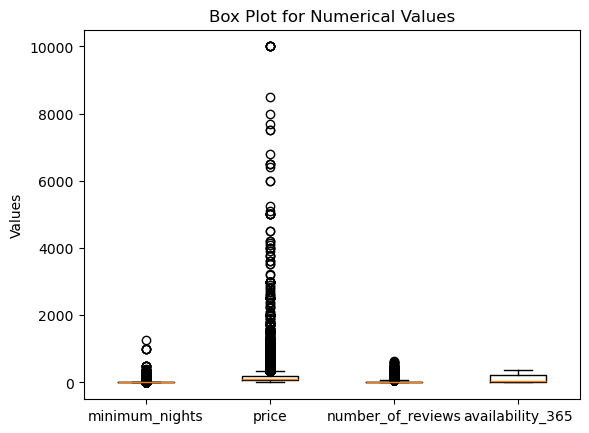

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("AB_NYC_2019.csv")
df=pd.DataFrame(data)

columns = ['minimum_nights', 'price','number_of_reviews','availability_365']#identify the columns with numerical values

#discovering potential outliers using box plot
plt.figure()
plt.boxplot([df[col] for col in columns], labels = columns)
plt.title("Box Plot for Numerical Values")
plt.ylabel("Values")
plt.show()

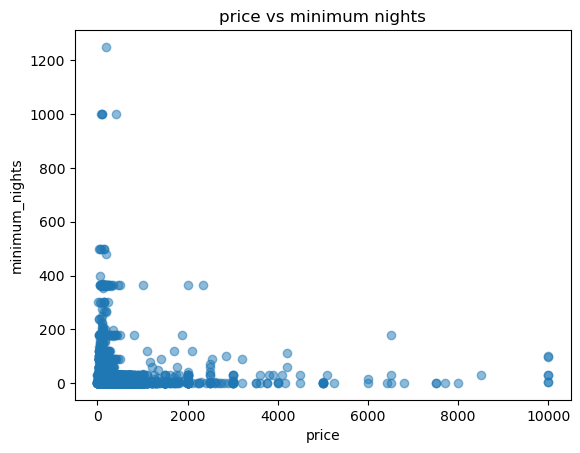

In [14]:
#using scatter plot for price vs minimum nights
plt.figure()
plt.scatter(df['price'],df['minimum_nights'],
           alpha=0.5)
plt.title('price vs minimum nights')
plt.xlabel('price')
plt.ylabel('minimum_nights')
plt.show()

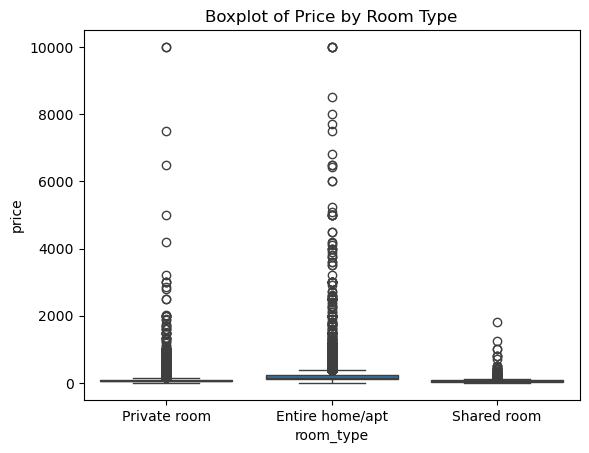

In [21]:
import seaborn as sns
#using box plot to see relationship between price and room type
#Assuming 'df' is the DataFrame containing the dataset
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Boxplot of Price by Room Type')
plt.show()

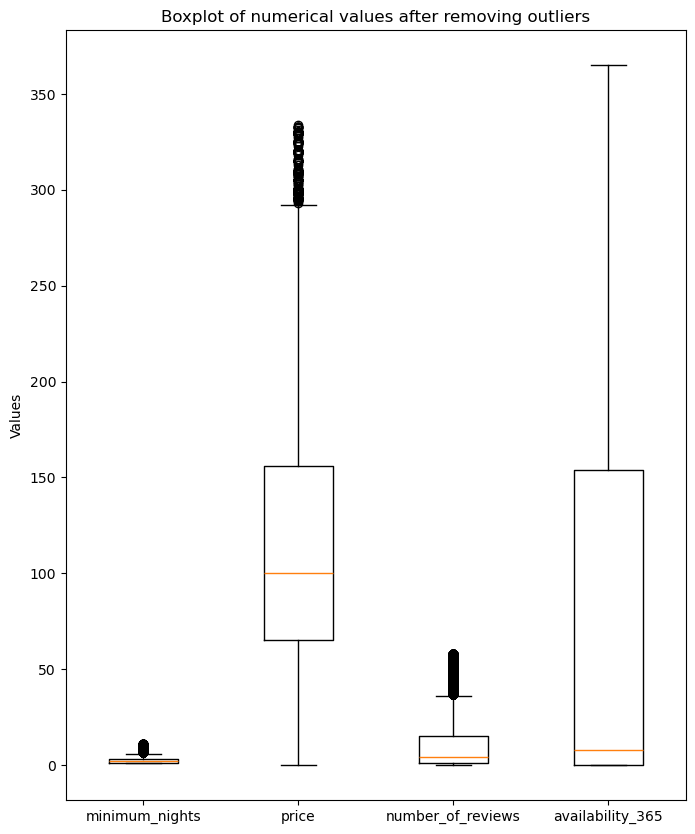

In [42]:
#outlier treatment using IQR method
#calculating Q1, Q3 and IQR
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
#setting the formula for outlier detection
outliers= Q3+1.5*IQR
#drop the rows containing outliers
df_outliers_removed = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
# box plot after outlier treatment
plt.figure()
plt.boxplot([df_outliers_removed[col] for col in columns], labels=columns)
plt.title("Boxplot of numerical values after removing outliers")
plt.ylabel("Values")
plt.show()

# 3.	Data Transformation (6 Marks)

Select only 'Private room' listings in 'Manhattan' neighborhood and save it to data_sub1.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("AB_NYC_2019.csv")
df=pd.DataFrame(data)
sorted = df[(df["room_type"] == 'Private room') & (df["neighbourhood_group"] == 'Manhattan')]
sorted
# sorted.to_csv('data_sub1.csv')
data_sub1_df = pd.DataFrame(sorted)
data_sub1_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48876,36478357,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088,Joseph,Manhattan,Harlem,40.80953,-73.95410,Private room,60,1,0,NaN,NaN,1,26
48883,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79755,-73.93614,Private room,75,2,0,NaN,NaN,2,364
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31


•	Filter data_sub1 to include only listings with 3 minimum number of nights and sort the data according to Price.

In [6]:
filtered_data = data_sub1_df[data_sub1_df["minimum_nights"] == 3] 
sorted_data = filtered_data.sort_values(by=['price'])
sorted_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28019,21893604,Private Bedroom in West Village/Chelsea,1144452,Dante,Manhattan,Chelsea,40.74045,-74.00047,Private room,12,3,8,2019-06-07,0.59,1,37
21143,16778904,"Quiet cozy apartment, air-conditioned room",111433024,Danielle,Manhattan,Washington Heights,40.84353,-73.94201,Private room,25,3,34,2019-05-31,1.46,1,139
11091,8583175,Big Bedroom in Manhattan with an Artist,28272799,Este,Manhattan,Harlem,40.82855,-73.94033,Private room,29,3,27,2018-12-19,0.59,1,0
27033,21394087,The Hideaway Upstairs,145242566,Corey,Manhattan,Harlem,40.81807,-73.95487,Private room,30,3,86,2019-06-24,4.32,2,0
13775,10368714,Martha's Apartment,53369750,Martha,Manhattan,Washington Heights,40.83790,-73.94095,Private room,30,3,119,2019-06-30,3.19,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23624,19114014,"Large, Private Carriage House in West Village",683230,Thomas,Manhattan,West Village,40.73444,-73.99967,Private room,950,3,36,2019-07-01,1.45,3,237
43130,33467371,"Private, Beautiful Upper Eastside Townhome",683230,Thomas,Manhattan,Upper East Side,40.76725,-73.95864,Private room,950,3,11,2019-06-30,4.23,3,251
20819,16489149,2 BDRM PRESIDENTIAL LUXURY CONDO MIDTOWN 45 N...,69545883,Chayla,Manhattan,Midtown,40.75373,-73.97272,Private room,999,3,1,2017-09-11,0.05,12,365
20094,16087406,2 BDRM Presidential Reserve at Wyndham Midtown 45,69545883,Chayla,Manhattan,Midtown,40.75368,-73.97358,Private room,1599,3,2,2017-06-09,0.08,12,365


•	Create data_sub2 where each row represents a unique combination of neighbourhood_group and room_type with average price for each combination. 

In [33]:
# data_sub2_df = pd.DataFrame(sorted_data)
# df = pd.read_csv("AB_NYC_2019.csv")

data_sub2_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean()
data_sub2_df 

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

•	Create a new column indicating high-demand area (availability_365 > 300), calculate the revenue for each listing (revenue = price * minimum_nights) and display the dataframe.

In [45]:
df['high_demand_area'] = df['availability_365'] > 300
df['revenue'] = df.price * df.minimum_nights
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,high_demand_area,revenue,price_bin
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,True,149,moderate
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,True,225,expensive
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,True,450,moderate
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False,89,budget
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False,800,budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,False,140,budget
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,False,160,budget
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,False,1150,moderate
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,False,55,budget


•	Bin the 'price' column into categories (e.g., budget, moderate, expensive) based on price ranges.

In [39]:
bins = [0, 100, 200, 300]
labels = ['budget', 'moderate', 'expensive']

df['price_bin'] = pd.cut(df['price'], bins, labels=labels)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,high_demand_area,revenue,price_bin
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,True,149,moderate
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,True,225,expensive
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,True,450,moderate
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False,89,budget
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False,800,budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,False,140,budget
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,False,160,budget
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,False,1150,moderate
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,False,55,budget


•	Calculate summary statistics (e.g., mean, median) for the 'price' column based on neighbourhood_group and room_type. 

Display the summary statistics for 'price'.

In [41]:
# Group by neighbourhood_group and room_type, then apply describe to price
price_desc = df.groupby(['neighbourhood_group', 'room_type'])['price'].describe()
price_desc

count        mean         std   min  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379.0  127.506596   95.027102  28.0   
                    Private room       652.0   66.788344  107.009071   0.0   
                    Shared room         60.0   59.800000  101.798871  20.0   
Brooklyn            Entire home/apt   9559.0  178.327545  226.415825   0.0   
                    Private room     10132.0   76.500099  124.713499   0.0   
                    Shared room        413.0   50.527845   53.444485   0.0   
Manhattan           Entire home/apt  13199.0  249.239109  331.830132   0.0   
                    Private room      7982.0  116.776622  190.191318  10.0   
                    Shared room        480.0   88.977083   92.416534  10.0   
Queens              Entire home/apt   2096.0  147.050573  129.383208  10.0   
                    Private room      3372.0   71.762456  180.506756  10.0   
                    Shared room        198.0   69.020202  171.000607  11.0   
Staten Island       Entire home/apt    176.0  173.846591  394.600216  48.0   
                    Private room       188.0   62.292553   36.138245  20.0   
                    Shared room          9.0   57.444444   45.119594  13.0   

                                       25%    50%     75%      max  
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  140.00   1000.0  
                    Private room      40.0   53.5   70.00   2500.0  
                    Shared room       28.0   40.0   55.50    800.0  
Brooklyn            Entire home/apt  105.0  145.0  199.00  10000.0  
                    Private room      50.0   65.0   80.00   7500.0  
                    Shared room       30.0   36.0   50.00    725.0  
Manhattan           Entire home/apt  142.5  191.0  259.00  10000.0  
                    Private room      68.0   90.0  120.00   9999.0  
                    Shared room       49.0   69.0   89.25   1000.0  
Queens              Entire home/apt   90.0  120.0  168.25   2600.0  
                    Private room      47.0   60.0   75.00  10000.0  
                    Shared room       30.0   37.0   54.25   1800.0  
Staten Island       Entire home/apt   75.0  100.0  151.25   5000.0  
                    Private room      40.0   50.0   75.00    300.0  
                    Shared room       29.0   30.0   75.00    150.0

•	Group the data by neighbourhood_group and calculate the average 'availability_365'. Display the average 'availability_365' for each 'neighbourhood_group.

In [43]:
avail_mean = df.groupby(['neighbourhood_group'])['availability_365'].mean()
avail_mean

neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64

# Part 2- Feature Selection (5 Marks)

Please perform the following tasks using Dataset2:

[Hint: you may refer to lab 6 to use a ready dataset by imputing the missing data with median]



In [24]:
!pip install mlxtend

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("wdbc.data")
data.columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave points", "Mean Symmetry", "Mean Fractal dimension", "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE", "Concave points SE", "Symmetry SE", "Fractal dimensiomn SE", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave points", "Worst Symmetry", "Worst Fractal dimension"]

print(data.isnull().sum())
data = data.replace('?',np.NaN)

print('\nNumber of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

#Check for any missing values in the dataprint('\nNumber of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave points        0
Mean Symmetry              0
Mean Fractal dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave points SE          0
Symmetry SE                0
Fractal dimensiomn SE      0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave points       0
Worst Symmetry             0
Worst Fractal dimension    0
dtype: int64

Number of instances = 568
Number of attributes = 32
	ID: 0

1.	Perform Feature Selection as follows:

•	Apply a forward selection by using linear regression, set k_features = 4. Record the selected features.


In [3]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("wdbc.data")
data.columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave points", "Mean Symmetry", "Mean Fractal dimension", "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE", "Concave points SE", "Symmetry SE", "Fractal dimensiomn SE", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave points", "Worst Symmetry", "Worst Fractal dimension"]

print("\nQuestion 2(a)")
#Perform a forward selection by using linear regression, set k_features = 4.
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})
x = data.drop(columns = ["Diagnosis"])
y = data["Diagnosis"]

LR = LinearRegression()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

step_forward = sfs(LR,
                   k_features = 4, 
                   forward = "True",
                   floating = "False", 
                   scoring = "r2", #use r2 for regression problem
                   cv = 0,
                   verbose = 2) #prints detailed information
step_forward = step_forward.fit(x_scaled, y)
print(list(step_forward.k_feature_idx_))


Question 2(a)



[2024-09-12 17:28:39] Features: 1/4 -- score: 0.6291362208490209
[2024-09-12 17:28:39] Features: 2/4 -- score: 0.689847518294031
[2024-09-12 17:28:39] Features: 3/4 -- score: 0.7126294375770718
[2024-09-12 17:28:39] Features: 4/4 -- score: 0.7218808379435737

[21, 22, 24, 28]


•	Apply a Filter method by using correlation. Select features with correlation > 0.5. Record the selected features.

In [11]:
import pandas as pd
data = pd.read_csv("wdbc.data")
data.columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave points", "Mean Symmetry", "Mean Fractal dimension", "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE", "Concave points SE", "Symmetry SE", "Fractal dimensiomn SE", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave points", "Worst Symmetry", "Worst Fractal dimension"]
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})
x = data.drop(columns = ["Diagnosis"])
y = data["Diagnosis"]

print("\nQuestion 2(b)")
#Perform a filter method by using correlation. Select features with correlation > 0.5.
cor = data.corr()
threshold = 0.5
s = abs(cor["Diagnosis"])
selectedFeature = s[s>0.5]
print(selectedFeature)
print()


Question 2(b)
Diagnosis               1.000000
Mean Radius             0.729376
Mean Perimeter          0.741887
Mean Area               0.708389
Mean Compactness        0.595587
Mean Concavity          0.695648
Mean Concave points     0.776369
Radius SE               0.565373
Perimeter SE            0.554416
Area SE                 0.546343
Worst Radius            0.775725
Worst Perimeter         0.782470
Worst Area              0.732925
Worst Compactness       0.589453
Worst Concavity         0.658348
Worst Concave points    0.793181
Name: Diagnosis, dtype: float64



•	Apply an embedded method by using Lasso Regression. Record the selected features.

Perform an embedded method by using Lasso Regression.



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011528419511552812, tolerance: 0.009832599118942733
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020601272871552112, tolerance: 0.009832599118942733
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023562904789752537, tolerance: 0.009832599118942733
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:6


Question 2(c)
Best alpha using built-in LassoCV: 0.000625
Best score using built-in LassoCV: 0.772236
ID                        -0.005552
Mean Radius               -0.000000
Mean Texture               0.019304
Mean Perimeter            -0.000000
Mean Area                 -0.030723
Mean Smoothness           -0.000000
Mean Compactness          -0.166333
Mean Concavity             0.101469
Mean Concave points        0.080676
Mean Symmetry             -0.000202
Mean Fractal dimension    -0.009743
Radius SE                  0.120452
Texture SE                -0.004321
Perimeter SE              -0.000104
Area SE                   -0.073622
Smoothness SE              0.047053
Compactness SE            -0.004458
Concavity SE              -0.095665
Concave points SE          0.043652
Symmetry SE                0.006484
Fractal dimensiomn SE     -0.009704
Worst Radius               0.548248
Worst Texture              0.046166
Worst Perimeter            0.000000
Worst Area                -0.3450

Text(0.5, 1.0, 'Feature importance using Lasso Model')

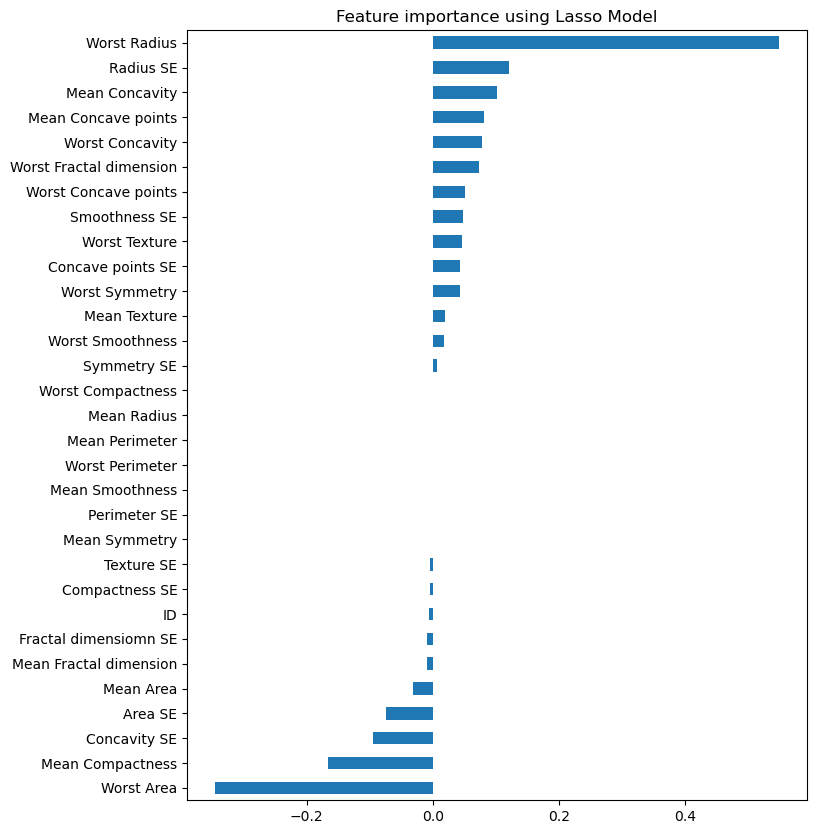

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("wdbc.data")
data.columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave points", "Mean Symmetry", "Mean Fractal dimension", "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE", "Concave points SE", "Symmetry SE", "Fractal dimensiomn SE", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave points", "Worst Symmetry", "Worst Fractal dimension"]
print("Perform an embedded method by using Lasso Regression.\n")
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})
x = data.drop(columns = ["Diagnosis"])
y = data["Diagnosis"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

reg = LassoCV(cv=5, random_state=0)  # Define the LassoCV model
reg.fit(x_scaled, y)

print("\nQuestion 2(c)")
#Perform an embedded method by using Lasso Regression.
reg = LassoCV(cv = 5, random_state = 0, max_iter = 5000, tol = 1e-4)
reg.fit(x_scaled, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(x_scaled, y))
coef = pd.Series(reg.coef_, index = x.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables.")

#Plot figure below shows features that are selected
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Part 3- Data Visualisation (5 Marks)

Select any TWO numerical variables from Dataset1. Use Pandas to create a histogram to visualise the distribution of each of these variables. Briefly describe each histogram.


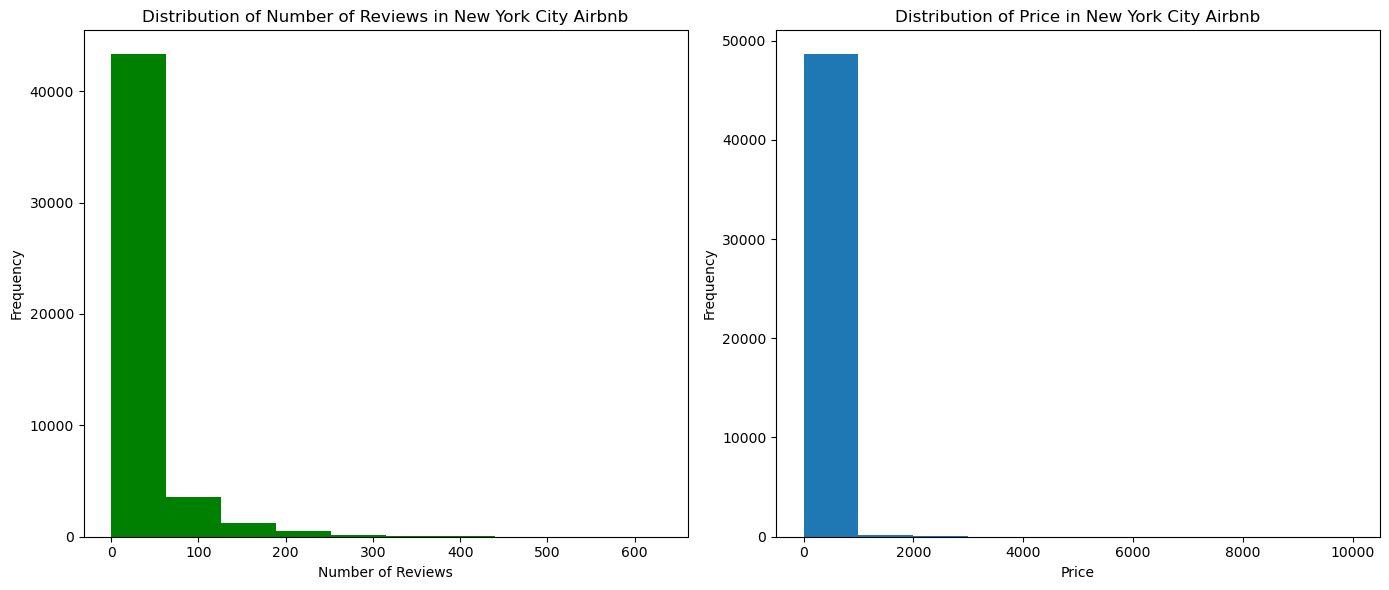

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
 
# Load dataset 
data = pd.read_csv("AB_NYC_2019.csv") 
 
num_of_reviews = data['number_of_reviews']
price = data['price']

plt.figure(figsize=(14, 6))

Dist1 = plt.subplot(1,2,1)
Dist1.hist(num_of_reviews, color='g')
Dist1.set_title('Distribution of Number of Reviews in New York City Airbnb')
Dist1.set_xlabel('Number of Reviews')
Dist1.set_ylabel('Frequency')

Dist2 = plt.subplot(1,2,2)
Dist2.hist(price)
Dist2.set_title('Distribution of Price in New York City Airbnb')
Dist2.set_xlabel('Price')
Dist2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# The histogram shows the distribution of the number of reviews for all Airbnb. The histogram is right-skewed which less Airbnb have higher rating and most Airbnb have less review. 
# The histogram shows the distribution of prices on Airbnb. The histogram is also right-skewed which most Airbnb are cheaper and affordable, but there are also a few that are expensive.